## Library imports

In [1]:
#stardard python data munching modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#text preprocessing modules
import re
import nltk
import spacy
import string
import gensim
import textblob
import textstat
import wordcloud
from spacy import displacy
from nltk.util import ngrams
from  collections import Counter
from spacy.lang.en.stop_words import STOP_WORDS

#sklearn  modules
from sklearn.feature_extraction.text import CountVectorizer
sns.set(palette='pastel')

In [2]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

## Loading datasets

In [3]:
train_tweets = pd.read_csv('climate-change-belief-analysis/train.csv')
test_tweets = pd.read_csv('climate-change-belief-analysis/test.csv')

## Initial Assigments

In [4]:
SEED = 42
mentions = []
hashtags = []
document_tweets = []
nlp = spacy.load('en_core_web_sm')

### Converting each tweet into a Spacy Document

In [5]:
%%time
_ = train_tweets['message'].apply(lambda tweet: document_tweets.append(nlp(tweet)))

Wall time: 6min 34s


In [6]:
news_index = train_tweets[train_tweets['sentiment'] == 2].index.tolist()
neutral_index = train_tweets[train_tweets['sentiment'] == 0].index.tolist()
positive_index = train_tweets[train_tweets['sentiment'] == 1].index.tolist()
negative_index = train_tweets[train_tweets['sentiment'] == -1].index.tolist()

## Initial Data Preprocessing

In [ ]:
def get_tweet_parts(tweet):
    tweet_list = []
    hashtag_list = []
    mention_list = []
    for word in tweet.split():
        if word.startswith('@') or word.startswith('RT'):
            mention_list.append(word)
        elif word.startswith("#"):
                hashtag_list.append(word)
        else:
            tweet_list.append(word)
    mentions.extend(mention_list)
    hashtags.extend(hashtag_list)
    return ' '.join(tweet_list)

In [ ]:
train_tweets['message'] = train_tweets['message'].apply(get_tweet_parts)

## Exploratory Data Analysis

### Character frequency analysis

[Text(0, 0.5, 'Number of characters per tweet'),
 Text(0.5, 0, 'Tweet Sentiment')]

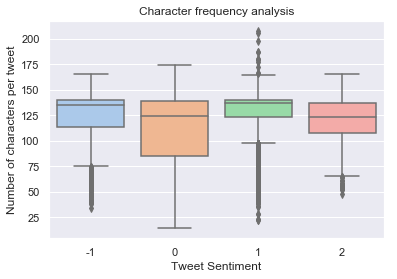

In [7]:
ax = sns.boxplot(x=train_tweets['sentiment'], y=train_tweets['message'].str.len(), data=train_tweets)
ax.set_title('Character frequency analysis')
ax.set(xlabel='Tweet Sentiment', ylabel="Number of characters per tweet")

##### ADD ANALYSIS OF VISUAL

### Word frequency analysis

[Text(0, 0.5, 'Number of words per tweet'), Text(0.5, 0, 'Tweet Sentiment')]

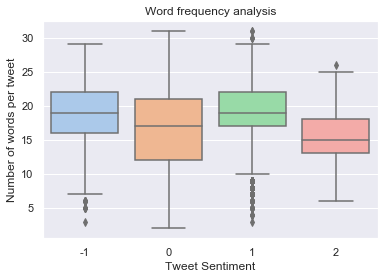

In [8]:
ax = sns.boxplot(x=train_tweets['sentiment'], y=train_tweets['message'].str.split().map(lambda x: len(x)), data=train_tweets)
ax.set_title('Word frequency analysis')
ax.set(ylabel="Number of words per tweet", xlabel='Tweet Sentiment')

##### ADD SOME ANAlYSIS

### Average word length analysis

[Text(0, 0.5, 'Average number of words per tweet'),
 Text(0.5, 0, 'Tweet Sentiment')]

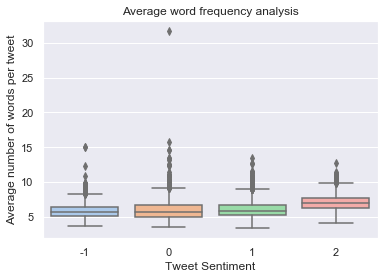

In [9]:
ax = sns.boxplot(x=train_tweets['sentiment'], y=train_tweets['message'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)), data=train_tweets)
ax.set_title('Average word frequency analysis')
ax.set(ylabel="Average number of words per tweet", xlabel='Tweet Sentiment')

#### ADD SOME ANALYSIS

In [10]:
def plot_top_stopwords_barchart(text):
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word.lower() in STOP_WORDS:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:] 
    x,y=zip(*top)
    return x,y
#     plt.bar(x,y)

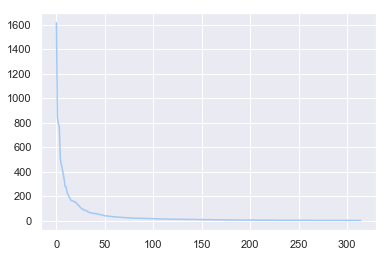

In [11]:
ax = plt.plot(plot_top_stopwords_barchart(train_tweets[train_tweets['sentiment'] == 2]['message'])[1])

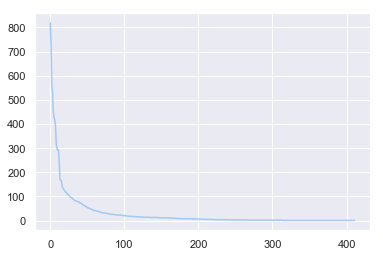

In [12]:
ax = plt.plot(plot_top_stopwords_barchart(train_tweets[train_tweets['sentiment'] == 0]['message'])[1])

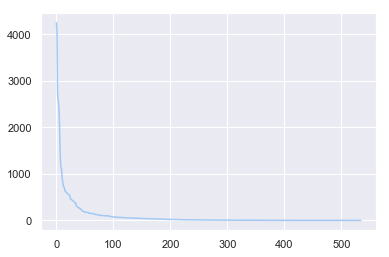

In [13]:
ax = plt.plot(plot_top_stopwords_barchart(train_tweets[train_tweets['sentiment'] == 1]['message'])[1])

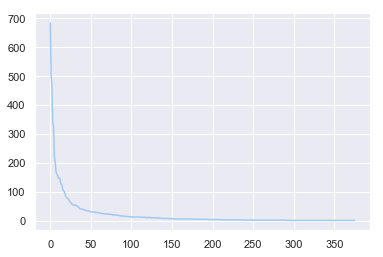

In [14]:
ax = plt.plot(plot_top_stopwords_barchart(train_tweets[train_tweets['sentiment'] == -1]['message'])[1])

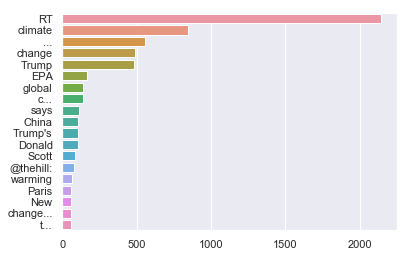

In [15]:
counter = Counter(train_tweets[train_tweets['sentiment'] == 2]['message'].to_string().split())
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word.lower() not in STOP_WORDS):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

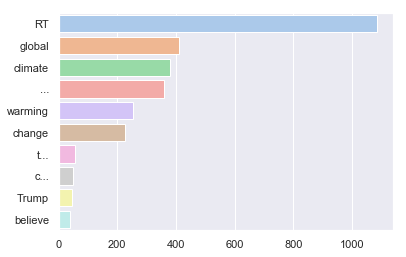

In [16]:
counter = Counter(train_tweets[train_tweets['sentiment'] == 0]['message'].to_string().split())
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word.lower() not in STOP_WORDS):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

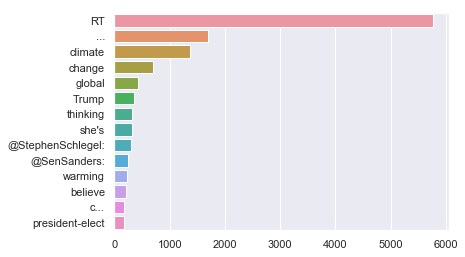

In [17]:
counter = Counter(train_tweets[train_tweets['sentiment'] == 1]['message'].to_string().split())
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word.lower() not in STOP_WORDS):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

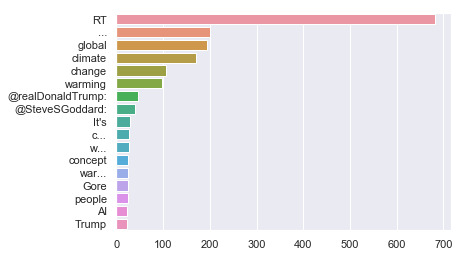

In [18]:
counter = Counter(train_tweets[train_tweets['sentiment'] == -1]['message'].to_string().split())
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word.lower() not in STOP_WORDS):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

### Ngram exploration

In [19]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:20]

#### Bi-gram analysis

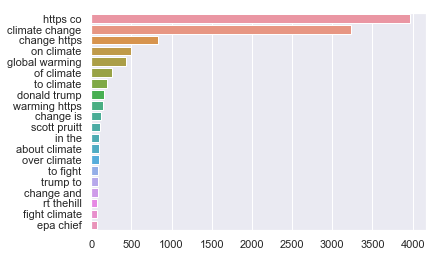

In [20]:
top_n_bigrams=get_top_ngram(train_tweets[train_tweets['sentiment'] == 2]['message'],2)
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

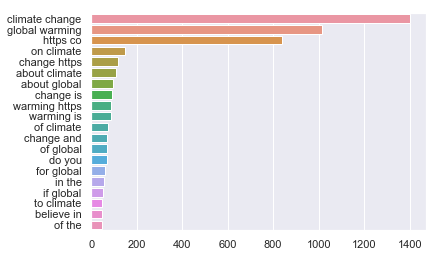

In [21]:
top_n_bigrams=get_top_ngram(train_tweets[train_tweets['sentiment'] == 0]['message'],2)[:20]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

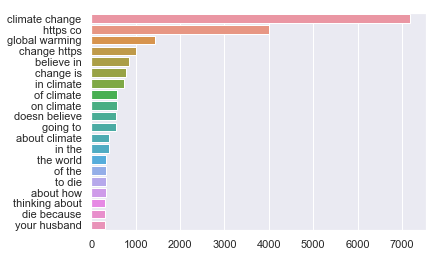

In [22]:
top_n_bigrams=get_top_ngram(train_tweets[train_tweets['sentiment'] == 1]['message'],2)[:20]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

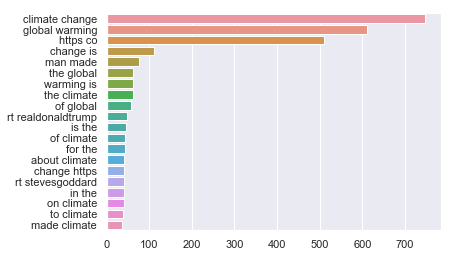

In [23]:
top_n_bigrams=get_top_ngram(train_tweets[train_tweets['sentiment'] == -1]['message'],2)[:20]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

#### Tri-gram analysis

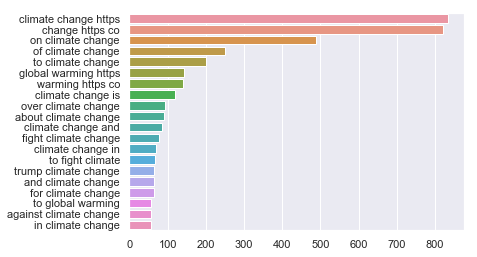

In [24]:
top_n_trigrams=get_top_ngram(train_tweets[train_tweets['sentiment'] == 2]['message'],3)[:20]
x,y=map(list,zip(*top_n_trigrams))
sns.barplot(x=y,y=x)

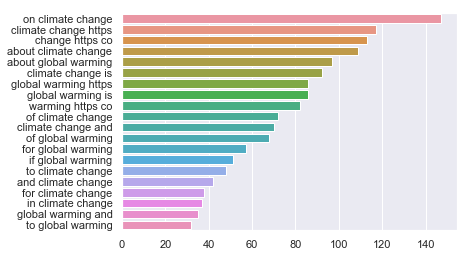

In [25]:
top_n_trigrams=get_top_ngram(train_tweets[train_tweets['sentiment'] == 0]['message'],3)[:20]
x,y=map(list,zip(*top_n_trigrams))
sns.barplot(x=y,y=x)

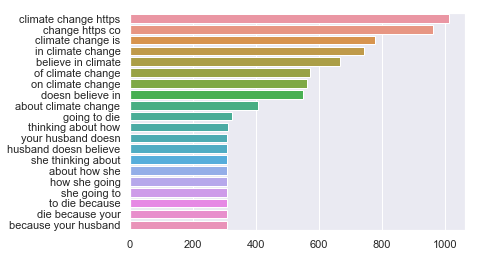

In [26]:
top_n_trigrams=get_top_ngram(train_tweets[train_tweets['sentiment'] == 1]['message'],3)[:20]
x,y=map(list,zip(*top_n_trigrams))
sns.barplot(x=y,y=x)

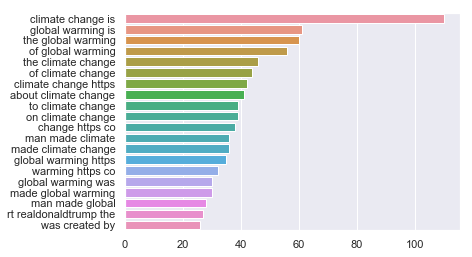

In [27]:
top_n_trigrams=get_top_ngram(train_tweets[train_tweets['sentiment'] == -1]['message'],3)[:20]
x,y=map(list,zip(*top_n_trigrams))
sns.barplot(x=y,y=x)

### Wordclouds analysis

In [28]:
def preprocess_tweets(df):
    corpus=[]
    stem = nltk.PorterStemmer()
    lem = nltk.WordNetLemmatizer()
    for tweets in df['message']:
        words = [word for word in nltk.word_tokenize(tweets) if (word.lower() not in STOP_WORDS)]
        
        words=[lem.lemmatize(word) for word in words if len(word)>2]
        
        corpus.append(words)
    return corpus



In [29]:
news_corpus = preprocess_tweets(train_tweets[train_tweets['sentiment'] == 2])
neutral_corpus = preprocess_tweets(train_tweets[train_tweets['sentiment'] == 0])
positive_corpus = preprocess_tweets(train_tweets[train_tweets['sentiment'] == 1])
negative_corpus = preprocess_tweets(train_tweets[train_tweets['sentiment'] == -1])

In [30]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

#### News wordcloud

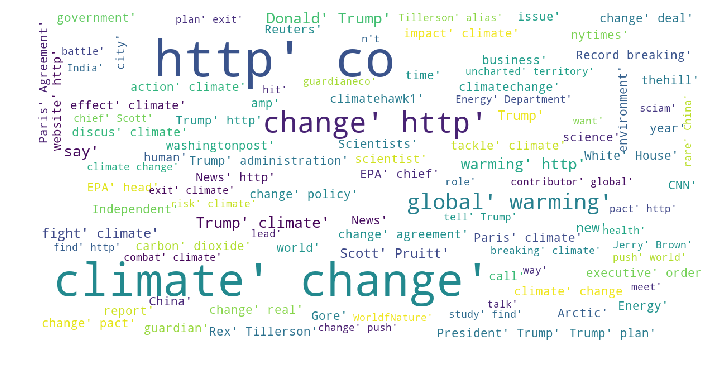

In [31]:
show_wordcloud(news_corpus)

#### Neutral sentiment wordcloud

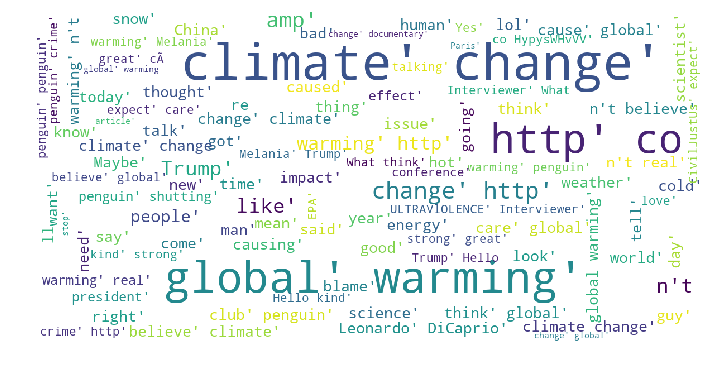

In [32]:
show_wordcloud(neutral_corpus)

#### Positive sentiment wordcloud

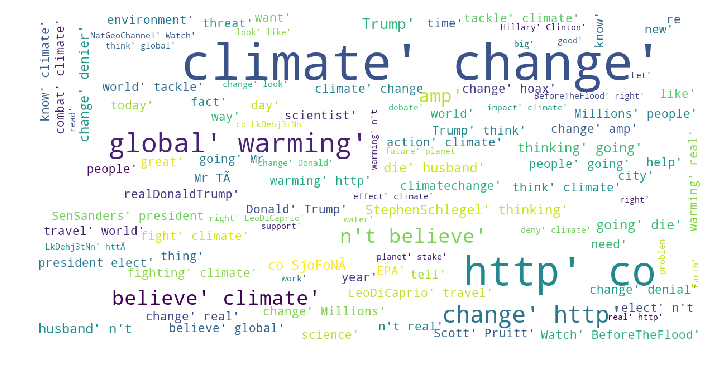

In [33]:
show_wordcloud(positive_corpus)

#### Neutral sentiment wordcloud

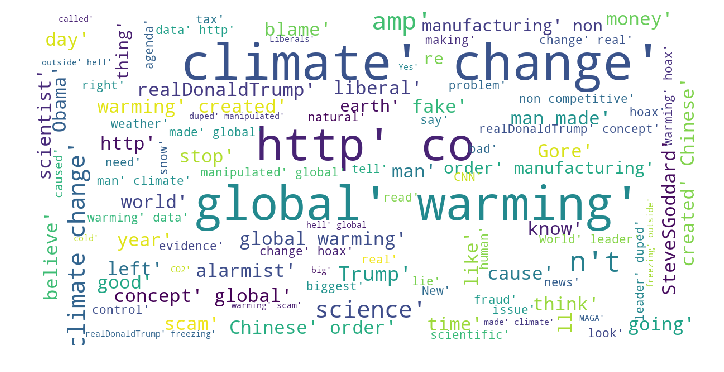

In [34]:
show_wordcloud(negative_corpus)

In [35]:
def get_ners(index_list, tweet_class):
    
    named_entities = Counter()
    for index in index_list:
        for ent in document_tweets[index].ents:
            named_entities[ent.label_] += 1
    entity_count, entities = map(list, zip(*named_entities.most_common()))
    ax = sns.barplot(x=entities, y=entity_count)
    ax.set_title(f'{tweet_class}')
    ax.set(xlabel='Entity count', ylabel='Named entities')

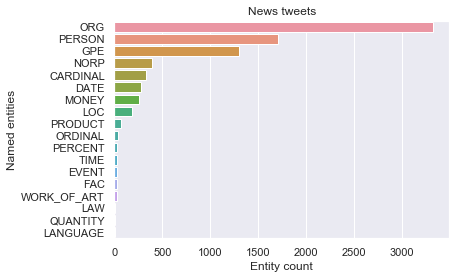

In [36]:
get_ners(news_index, 'News tweets')

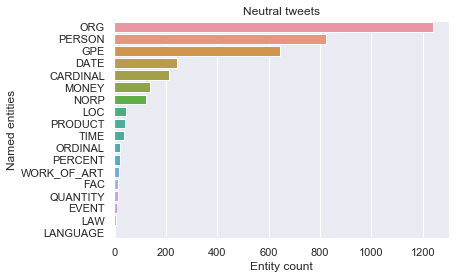

In [37]:
get_ners(neutral_index, 'Neutral tweets')

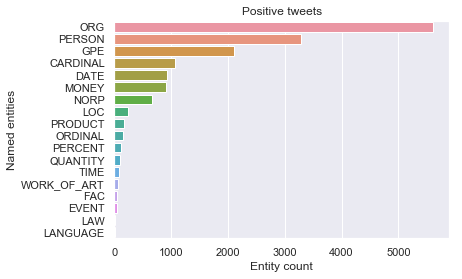

In [38]:
get_ners(positive_index, 'Positive tweets')

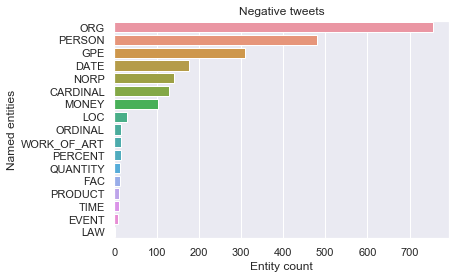

In [39]:
get_ners(negative_index, 'Negative tweets')

In [211]:
def get_entities(doc,ent="ORG"):
    return [X.text for X in doc.ents if X.label_ == ent]
gpe = []
for doc in document_tweets:
    gpe.append(get_entities(doc))
gpe=[i for x in gpe for i in x]
counter=Counter(gpe)

x,y=map(list,zip(*counter.most_common()))
# sns.barplot(y,x)
x

['RT',
 'EPA',
 'Ã¢â‚¬Â',
 "Trump's",
 'CO2',
 'Trump',
 'RT @BernieSanders',
 'Exxon',
 'UN',
 'RT @thehill',
 'RT @ClimateCentral',
 'NASA',
 'HRC',
 'iÃ¢â‚¬Â',
 'GOP',
 'Trump’s',
 '@realDonaldTrump',
 'CNN',
 'RT @washingtonpost',
 'RT @nytimes',
 'RT @realDonaldTrump',
 'RT @SteveSGoddard',
 'White House',
 'RT @Independent',
 'Guardian',
 'Obama',
 'RT @WorldfNature',
 'NYT',
 'NOAA',
 'RT @guardianeco',
 'EU',
 '#',
 'RT @NRDC',
 'CDC',
 'RT @Slate',
 'RT @UN',
 'Congress',
 'RT @iansomerhalder',
 'RT @nowthisnews',
 'the White House',
 'State',
 'RT @business',
 'RT @billmckibben',
 'G7',
 "Trump: '",
 'House',
 'RT @PopSci',
 'https://t.c',
 '\xa0',
 'DUP',
 'RT @UNEP',
 'Paris Agreement',
 '@NASA',
 'RT @c40cities',
 '&',
 '@POTUS',
 'RT @davidsirota',
 'RT @Fusion: America',
 'Reuters',
 'RT @LastWeekTonight',
 'Science',
 'the Natural Resources Defense Council',
 'RT @PrisonPlanet',
 'Shell',
 'BBC News',
 '@YouTube',
 'The White House',
 'RT @AltNatParkSer',
 'USDA',
 'The

In [41]:
def get_entities(doc,ent="ORG"):
    return [X.text for X in doc.ents if X.label_ == ent]
gpe = []
for doc in document_tweets:
    gpe.append(get_entities(doc))
gpe=[i for x in gpe for i in x]
counter=Counter(gpe)

x,y=map(list,zip(*counter.most_common(250)))
# sns.barplot(y,x)
x

['RT',
 'EPA',
 'Ã¢â‚¬Â',
 "Trump's",
 'CO2',
 'Trump',
 'RT @BernieSanders',
 'Exxon',
 'UN',
 'RT @thehill',
 'RT @ClimateCentral',
 'NASA',
 'HRC',
 'iÃ¢â‚¬Â',
 'GOP',
 'Trump’s',
 '@realDonaldTrump',
 'CNN',
 'RT @washingtonpost',
 'RT @nytimes',
 'RT @realDonaldTrump',
 'RT @SteveSGoddard',
 'White House',
 'RT @Independent',
 'Guardian',
 'Obama',
 'RT @WorldfNature',
 'NYT',
 'NOAA',
 'RT @guardianeco',
 'EU',
 '#',
 'RT @NRDC',
 'CDC',
 'RT @Slate',
 'RT @UN',
 'Congress',
 'RT @iansomerhalder',
 'RT @nowthisnews',
 'the White House',
 'State',
 'RT @business',
 'RT @billmckibben',
 'G7',
 "Trump: '",
 'House',
 'RT @PopSci',
 'https://t.c',
 '\xa0',
 'DUP',
 'RT @UNEP',
 'Paris Agreement',
 '@NASA',
 'RT @c40cities',
 '&',
 '@POTUS',
 'RT @davidsirota',
 'RT @Fusion: America',
 'Reuters',
 'RT @LastWeekTonight',
 'Science',
 'the Natural Resources Defense Council',
 'RT @PrisonPlanet',
 'Shell',
 'BBC News',
 '@YouTube',
 'The White House',
 'RT @AltNatParkSer',
 'USDA',
 'The

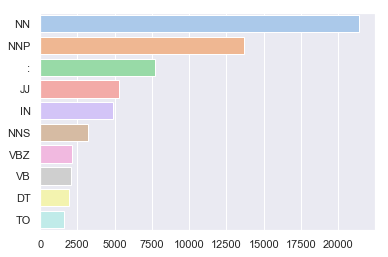

In [42]:
def pos(text):
    pos=nltk.pos_tag(nltk.word_tokenize(text))
    pos=list(map(list,zip(*pos)))[1]
    return pos

tags = []
news_indices = train_tweets[train_tweets['sentiment'] == 2].index.tolist()
for ni in news_indices:
    tags.append(pos(document_tweets[ni].text))
tags = [x for l in tags for x in l]
counter=Counter(tags)

x,y=list(map(list,zip(*counter.most_common(10))))
sns.barplot(x=y,y=x)

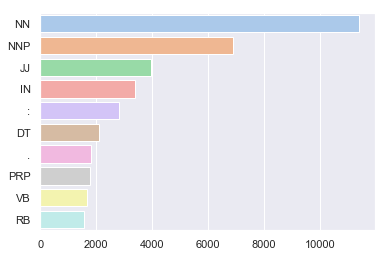

In [43]:
tags = []
news_indices = train_tweets[train_tweets['sentiment'] == 0].index.tolist()
for ni in news_indices:
    tags.append(pos(document_tweets[ni].text))
tags = [x for l in tags for x in l]
counter=Counter(tags)

x,y=list(map(list,zip(*counter.most_common(10))))
sns.barplot(x=y,y=x)

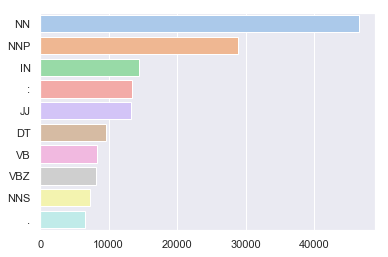

In [45]:
tags = []
news_indices = train_tweets[train_tweets['sentiment'] == 1].index.tolist()
for ni in news_indices:
    tags.append(pos(document_tweets[ni].text))
tags = [x for l in tags for x in l]
counter=Counter(tags)

x,y=list(map(list,zip(*counter.most_common(10))))
sns.barplot(x=y,y=x)

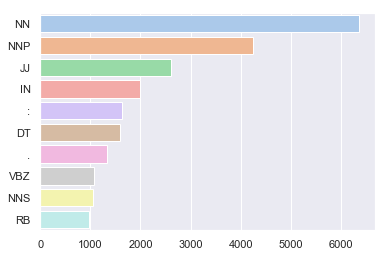

In [44]:
tags = []
news_indices = train_tweets[train_tweets['sentiment'] == -1].index.tolist()
for ni in news_indices:
    tags.append(pos(document_tweets[ni].text))
tags = [x for l in tags for x in l]
counter=Counter(tags)

x,y=list(map(list,zip(*counter.most_common(10))))
sns.barplot(x=y,y=x)

In [ ]:
# def get_adjs(text):
#     adj=[]
#     pos=nltk.pos_tag(nltk.word_tokenize(text))
#     for word,tag in pos:
#         if tag=='NN':
#             adj.append(word)
#     return adj
# words =[]
# news_indices = train_tweets[train_tweets['sentiment'] == -1].index.tolist()
# for ni in news_indices:
#     tags.append(get_adjs(document_tweets[ni].text))
# words=[x for l in words for x in l]
# counter=Counter(words)
# words
# x,y=list(map(list,zip(*counter.most_common(10))))
# sns.barplot(x=y,y=x)

In [262]:
def get_pos_tags(index_list, pos='ADJ'):
    pos_tags = []
    for index in index_list:
        for token in document_tweets[index]:
            if token.pos_ == pos:
                pos_tags.append(token.text)
    return list(set(pos_tags))

news_adjs = get_pos_tags(news_index)
neutral_adjs = get_pos_tags(neutral_index)
negative_adjs = get_pos_tags(negative_index)
positive_adjs = get_pos_tags(positive_index)

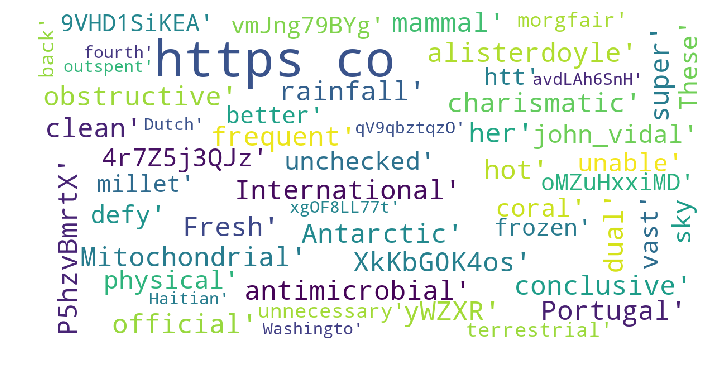

In [265]:
show_wordcloud(list(set(news_adjs))[0:50])

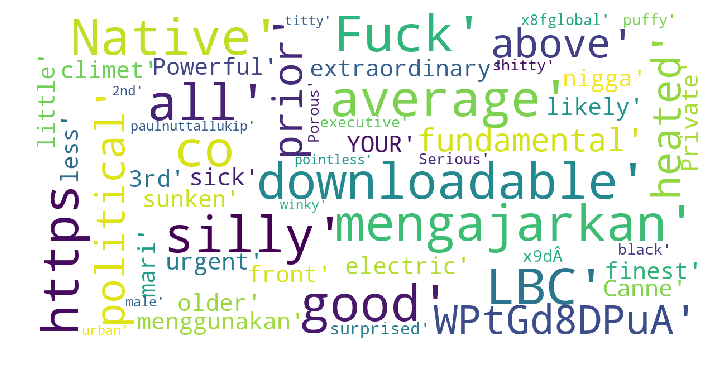

In [266]:
show_wordcloud(list(set(neutral_adjs))[0:50])

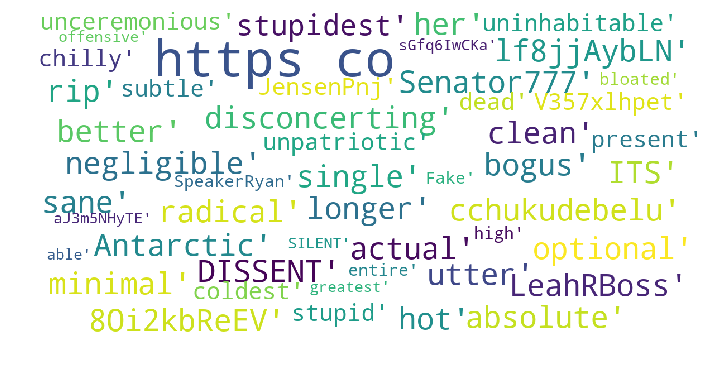

In [268]:
show_wordcloud(list(set(negative_adjs))[0:50])

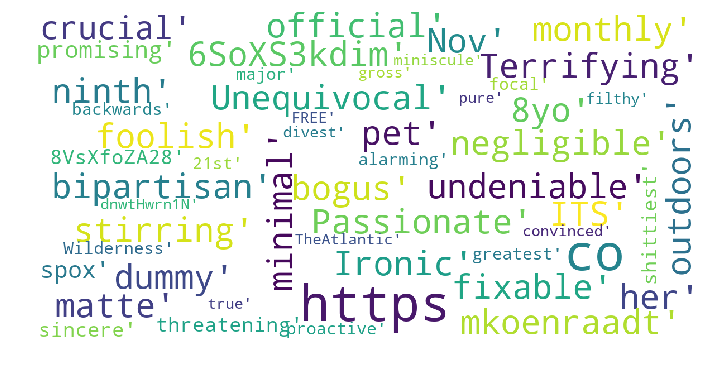

In [269]:
show_wordcloud(list(set(positive_adjs))[0:50])